In [1]:
from typing import TypedDict

class Port(TypedDict):
    amt:float
    usd:float
    target:str
    total:float

In [6]:
def calc_usd(state:Port)->Port:
    state['usd']=state['amt']*1.08
    return state

def calc_inr(state:Port)->Port:
    state['total']=state['usd']*90.0
    return state

def calc_eur(state:Port)->Port:
    state['total']=state['usd']*50.0
    return state

def choose(state:Port)->str:
    return state["target"]


In [7]:
from langgraph.graph import StateGraph, START, END

builder=StateGraph(Port)
builder.add_node("calc_usd",calc_usd)
builder.add_node("calc_inr",calc_inr)
builder.add_node("calc_eur",calc_eur)
builder.add_edge(START,"calc_usd")
builder.add_conditional_edges(
    "calc_usd",
    choose,
    {
        "INR":"calc_inr",
        "EUR":"calc_eur",
    }
)
builder.add_edge(["calc_inr","calc_eur"],END)

graph=builder.compile()

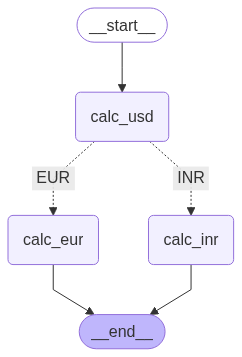

In [8]:
from IPython.display import  Image,display

display(Image(graph.get_graph().draw_mermaid_png()))

In [10]:
graph.invoke({'amt': 1000.0,"target":"EUR"})

{'amt': 1000.0, 'usd': 1080.0, 'target': 'EUR', 'total': 54000.0}